## <center>Universidade Federal do Pampa - _Campus_ Alegrete </center>
## <center>Engenharia de Software</center>
### <center>Introdução à Analise de Dados</center>
### <center>Professora: Andréa Bordin</center>
### <center>Acadêmicos: Ícaro Crespo e Lucas Augusto Garais</center>

### Análise da Mídia Social Twitter: contas @netflix e @NetflixBrasil e #winx
##### Este trabalho analisa a rede social Twitter utilizando sua API, as contas @netflix e @NetflixBrasil e a #winx, a fim de levantar dados sobre a multinacional Netflix, em especial ao anúncio de uma nova produção em cartaz Fate: A Saga Winx. É pretendido analisar questões _hotwords_, polaridade e outras _hashtags_ que acompanham a #winx.

## Questões de Pesquisa
1) Em suma, sobre os tweets da conta @netflix, quais foram as palavras que mais apareceram?

2) Em suma, sobre os tweets da conta @NetflixBrasil, quais foram as palavras que mais apareceram?

3) Quais outras hashtags apareceram em conjunto da #winx?

4) Tratando-se de polaridade, quais são os tweets que apresentam polaridades mais positivas?

5) Em relação à polaridade, quais são os tweets que apresentam polaridades mais negativas?

6) Qual a média de sentimento dos tweets que contam com a #winx?

### Importações de bibliotecas

In [70]:
import tweepy
import twitter
from textblob import TextBlob as tb
from wordcloud import WordCloud

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from collections import Counter
from prettytable import PrettyTable

### Definição das figuras

In [71]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

### Configuração das credenciais da API do Twitter

In [72]:
config = pd.read_csv("../keys twitter.csv", sep=";")
twitterApiKey = config['twitterApiKey'][0]
twitterApiSecret = config['twitterApiSecret'][0]
twitterApiAccessToken = config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret = config['twitterApiAccessTokenSecret'][0]

config2 = pd.read_csv("../keys twitter_adm.csv", sep=";")
CONSUMER_KEY = config2['twitterApiKey'][0]
CONSUMER_SECRET = config2['twitterApiSecret'][0]
OAUTH_TOKEN = config2['twitterApiAccessToken'][0]
OAUTH_TOKEN_SECRET = config2['twitterApiAccessTokenSecret'][0]

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print(twitter_api)

### Autenticação

In [73]:
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
twetterApi = tweepy.API(auth, wait_on_rate_limit = True)

### Conta(s) em foco

In [74]:
account1 = "netflix"
account2 = "NetflixBrasil"

In [76]:
tweets1 = tweepy.Cursor(twetterApi.user_timeline, 
                        screen_name=account1, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(5000);

tweets2 = tweepy.Cursor(twetterApi.user_timeline, 
                        screen_name=account2, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(5000);

In [77]:
#Account1
df1 = pd.DataFrame(data=[tweet.text for tweet in tweets1], columns=['Tweet'])

#Account2
df2 = pd.DataFrame(data=[tweet.text for tweet in tweets2], columns=['Tweet'])


In [78]:
pd.set_option('display.max_colwidth', 240)

print('Netflix')
df1.head()

Netflix


,Tweet
0,You want to talk about TALENT?\n\nLet’s talk about Chadwick Boseman. https://t.co/PN0BuV7tpq
1,RT @thedanieb: Can’t wait to watch Ma Rainey’s Black Bottom Friday!!
2,RT @JayPharoah: Let's goo🙏🏾🙏🏾 https://t.co/Pb6Ii9zEs0
3,RT @GiaPeppers: Chadwick is incredible in this. The entire cast is. https://t.co/NeqOVKxjkW
4,RT @iamjimkelly: Chadwick Boseman legit learned how to play the trumpet 🎺 for his role in Ma Rainey's Black Bottom. His acting genius. 😭 ht…


In [79]:
print('Netflix Brasil')
df2.head()

Netflix Brasil


,Tweet
0,"Pega esse elenco de Lulli, o mais novo filme com a @larimanoela.\n\nAntes que me perguntem, ainda não tenho datas, va… https://t.co/v09C2M5VYF"
1,"Se emocionou com os 12 minutos de Se Algo Acontecer... Te Amo? Então você vai gostar de Canvas, meu novo curta-metr… https://t.co/YQ1l0arNog"
2,"Não posso te dar um namoradinho, mas um recap da primeira temporada de Namorado de Natal eu posso, sim. 💕 https://t.co/qclAXh9KL1"
3,"Fiz um teste aqui e percebi que meu coração aguenta um filme com Wagner Moura, Ryan Gosling, Chris Evans, Jessica H… https://t.co/xYqjDNfOUC"
4,Hoje é aniversário da maravilhosa Sarah Paulson❤️\nE nesse tweet tá liberado vocês pedirem pra eu avisar qualquer co… https://t.co/tqeKmCtg1g


### Análise de Sentimento
#### Funções de Subjetividade e Polaridade

In [80]:
def getTextSubjectivity(txt):
    return tb(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return tb(txt).sentiment.polarity

In [81]:
# Aplicando funções nos dataframes

df1['Subjectivity'] = df1['Tweet'].apply(getTextSubjectivity)
df1['Polarity'] = df1['Tweet'].apply(getTextPolarity)

df2['Subjectivity'] = df2['Tweet'].apply(getTextSubjectivity)
df2['Polarity'] = df2['Tweet'].apply(getTextPolarity)


In [103]:
# Função para categorizar Tweets em Positivos, Negativos e Neutros.
def getTextAnalysis(a):
    if a < 0:
        return "Negativo"
    elif a == 0:
        return "Neutro"
    else:
        return "Positivo"

In [104]:
# Aplicando função de categorização nos dataframes
df1['Score'] = df1['Polarity'].apply(getTextAnalysis)

df2['Score'] = df2['Polarity'].apply(getTextAnalysis)

In [84]:
df1.head()

,Tweet,Subjectivity,Polarity,Score
0,You want to talk about TALENT?\n\nLet’s talk about Chadwick Boseman. https://t.co/PN0BuV7tpq,0.000000,0.000000,Neutral
1,RT @thedanieb: Can’t wait to watch Ma Rainey’s Black Bottom Friday!!,0.433333,-0.260417,Negative
2,RT @JayPharoah: Let's goo🙏🏾🙏🏾 https://t.co/Pb6Ii9zEs0,0.000000,0.000000,Neutral
3,RT @GiaPeppers: Chadwick is incredible in this. The entire cast is. https://t.co/NeqOVKxjkW,0.762500,0.450000,Positive
4,RT @iamjimkelly: Chadwick Boseman legit learned how to play the trumpet 🎺 for his role in Ma Rainey's Black Bottom. His acting genius. 😭 ht…,0.216667,-0.083333,Negative


In [85]:
df2.head()

,Tweet,Subjectivity,Polarity,Score
0,"Pega esse elenco de Lulli, o mais novo filme com a @larimanoela.\n\nAntes que me perguntem, ainda não tenho datas, va… https://t.co/v09C2M5VYF",0.0,0.0,Neutral
1,"Se emocionou com os 12 minutos de Se Algo Acontecer... Te Amo? Então você vai gostar de Canvas, meu novo curta-metr… https://t.co/YQ1l0arNog",0.0,0.0,Neutral
2,"Não posso te dar um namoradinho, mas um recap da primeira temporada de Namorado de Natal eu posso, sim. 💕 https://t.co/qclAXh9KL1",0.0,0.0,Neutral
3,"Fiz um teste aqui e percebi que meu coração aguenta um filme com Wagner Moura, Ryan Gosling, Chris Evans, Jessica H… https://t.co/xYqjDNfOUC",0.0,0.0,Neutral
4,Hoje é aniversário da maravilhosa Sarah Paulson❤️\nE nesse tweet tá liberado vocês pedirem pra eu avisar qualquer co… https://t.co/tqeKmCtg1g,0.0,0.0,Neutral


### Limpeza de dados

In [86]:
# Cleaning the tweets

def limparTweet(txt):
    # Remove mentions
     txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
     txt = re.sub(r'#', '', txt)
    # Remove retweets:
     txt = re.sub(r'RT : ', '', txt)
    # Remove urls
     txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
     return txt


def limparUrl(txt):
    # Remove mentions
     txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
     txt = re.sub(r'#', '', txt)
    # Remove retweets:
     txt = re.sub(r'RT : ', '', txt)
    # Remove urls
     txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
     return txt

In [87]:
df1['Tweet'] = df1['Tweet'].apply(limparUrl)

df2['Tweet'] = df2['Tweet'].apply(limparUrl)

### Removendo linhas vazias 

In [88]:
df1 = df1.drop(df1[df1['Tweet'] == ''].index)

df2 = df2.drop(df2[df2['Tweet'] == ''].index)

In [89]:
import json

query = '#winx' 

count = 5000

search_results = twitter_api.search.tweets(q=query, count=count)

print (type(search_results))
print()
print (json.dumps(search_results, indent=2))

<class 'twitter.api.TwitterDictResponse'>

{
  "statuses": [
    {
      "created_at": "Fri Dec 18 16:08:43 +0000 2020",
      "id": 1339965827492229121,
      "id_str": "1339965827492229121",
      "text": "RT @mackenziedravis: i\u2019m gay so i have every right to make things gay #winx https://t.co/aLudkBAfeq",
      "truncated": false,
      "entities": {
        "hashtags": [
          {
            "text": "winx",
            "indices": [
              70,
              75
            ]
          }
        ],
        "symbols": [],
        "user_mentions": [
          {
            "screen_name": "mackenziedravis",
            "name": "maxy \u200e\u29d7",
            "id": 2244681954,
            "id_str": "2244681954",
            "indices": [
              3,
              19
            ]
          }
        ],
        "urls": [],
        "media": [
          {
            "id": 1339617868217020416,
            "id_str": "1339617868217020416",
            "indices": [
         

### Análise de Dados

#### 1) Em suma, sobre os tweets da conta @netflix, quais foram as palavras que mais apareceram?

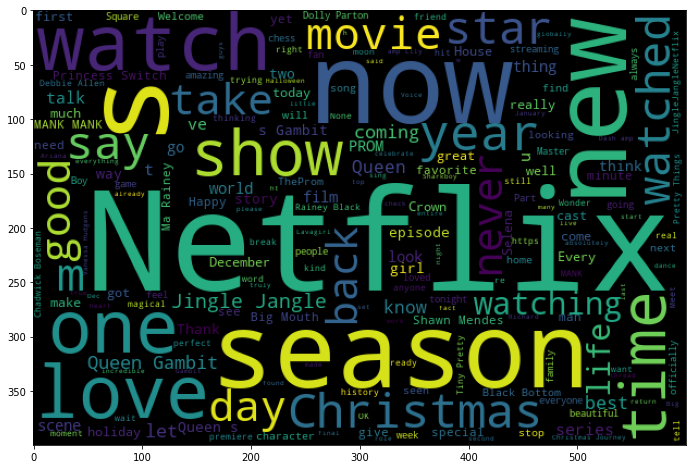

In [90]:
df_netflix = df1
df_netflix = df_netflix['Tweet'].apply(limparTweet)
    
words = ' '.join([tweet for tweet in df_netflix])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

#### 2) Em suma, sobre os tweets da conta @NetflixBrasil, quais foram as palavras que mais apareceram?

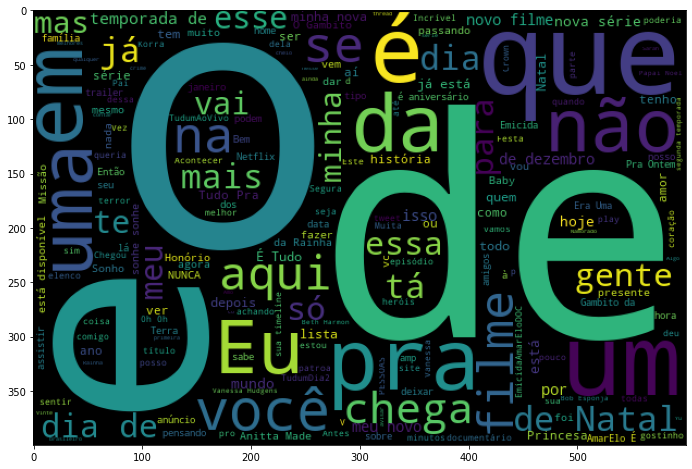

In [91]:
df_netflixBr = df2
df_netflixBr = df_netflixBr['Tweet'].apply(limparTweet)
    
words = ' '.join([tweet for tweet in df_netflixBr])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

#### 3) Quais outras hashtags apareceram em conjunto da #winx?

In [96]:
statuses = search_results['statuses']

status_texts = [ status['text'] 
                   for status in statuses ]

t = statuses[0]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

for item in [hashtags]:
    c = Counter(item)

    
words = [ w 
          for t in status_texts 
              for w in t.split() ]

for label, data in (('Palavras', words), 
                    ('Hashtags', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:15] ]
    pt.align[label], pt.align['Count'] = 'l', 'r'
    print(pt)

+-------------------------+-------+
| Palavras                | Count |
+-------------------------+-------+
| RT                      |    91 |
| gay                     |    72 |
| #winx                   |    68 |
| to                      |    44 |
| i                       |    41 |
| so                      |    39 |
| make                    |    39 |
| @mackenziedravis:       |    36 |
| i’m                     |    36 |
| have                    |    36 |
| every                   |    36 |
| right                   |    36 |
| things                  |    36 |
| https://t.co/aLudkBAfeq |    36 |
| #winxclub               |    13 |
+-------------------------+-------+
+-----------------+-------+
| Hashtags        | Count |
+-----------------+-------+
| winx            |    69 |
| winxclub        |    13 |
| WINX            |    13 |
| Winx            |     7 |
| WinxNetflix     |     5 |
| WinxClub        |     3 |
| Winxnetflix     |     2 |
| ArtistOnTwitter |     2 |
| art   

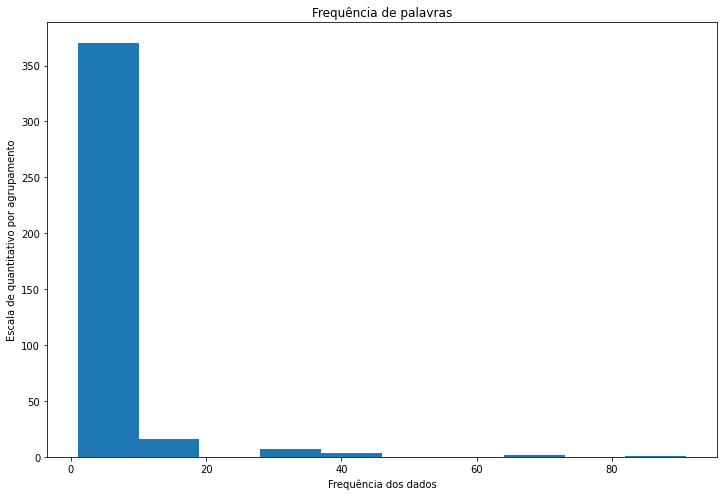

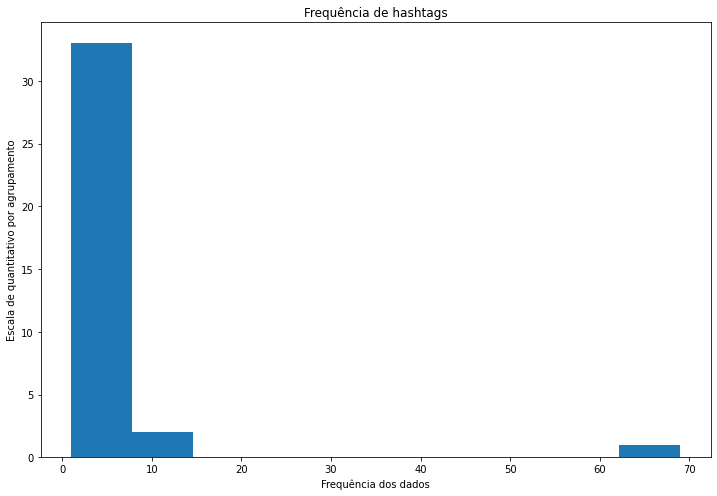

<Figure size 864x576 with 0 Axes>

In [97]:
for label, data in (('Frequência de palavras', words), 
                    ('Frequência de hashtags', hashtags)):

    c = Counter(data)
    plt.hist(list(c.values()))
    
    plt.title(label)
    plt.ylabel("Escala de quantitativo por agrupamento")
    plt.xlabel("Frequência dos dados")
    
    plt.figure()

### Análise de Polaridade dos Tweets

#### 4) Tratando-se de polaridade, quais são os tweets que apresentam polaridades mais positivas?

##### @Netflix

In [98]:
df1_ordenado = df1.sort_values(by ='Polarity', ascending = False)
df1_ordenado.head()

,Tweet,Subjectivity,Polarity,Score
451,"I hadn’t heard a thing about this before watching it, and now can add it to the best horror movies of the year. One of a m…",0.3,1.0,Positive
495,The best news you've heard all year: Chappelle's Show is coming to Netflix US,0.3,1.0,Positive
269,I think Master of None has one of the best thanksgiving episodes of all time,0.3,1.0,Positive
268,I will say the best thanksgiving ep was master of none,0.3,1.0,Positive
305,I’m 3 minutes in but Christmas On The Square is already the best film I’ve ever seen. Dolly Parton and Christine Baranski tog…,0.3,1.0,Positive


##### @NetflixBrasil

In [99]:
df2_ordenado = df2.sort_values(by ='Polarity', ascending = False)
df2_ordenado.head()

,Tweet,Subjectivity,Polarity,Score
136,Love ❌\nCarinho ❌\nBeijinho ❌\nConchinha ❌\nAssistir uma comédia romântica e dormir sozinha ✅,0.600000,0.500000,Positive
7,"Ok, vamos lá: thread com os melhores trocadilhos com o título O Gambito da Rainha.",0.500000,0.500000,Positive
6,"Mistério, crime, folclore brasileiro: minha nova série original com o e a tem tudo. Criad…",0.750000,0.375000,Positive
58,"Você só vai estar a salvo da minha nova série coreana de terror, Sweet Home, até dia 18 de dezembro. Depois não tem…",0.650000,0.350000,Positive
11,"My new series, Anitta: Made In Honório, is now available on / for you to binge-watch!\n\nMi nueva serie,…",0.427273,0.318182,Positive


#### 5) Em relação à polaridade, quais são os tweets que apresentam polaridades mais negativas?

##### @netflix

In [100]:
df1_ordenado = df1.sort_values(by ='Polarity', ascending = True)
df1_ordenado.head()

,Tweet,Subjectivity,Polarity,Score
170,[watching Mank with my boyfriend]\n\n[Mank appears on screen]\n\nME: that's mank,1.0,-0.75,Negative
173,"[ waiting room]\n\nMe: [chanting] Mank, Mank-\n\nOthers in lobby: Mank, MANK\n\nSecretary: [pounding her clipboard] MA…",1.0,-0.75,Negative
118,sorry time but this is my person of the year,1.0,-0.50,Negative
81,"Give it some ZAZZ \nIs it wrong of me to suggest your Saturday night viewing be ....🤓🌈💜\n\nRainbows, Sparkles,…",0.9,-0.50,Negative
331,Pacey Witter: setting unrealistic expectations for boyfriends since 1998,1.0,-0.50,Negative


##### @NetflixBrasil

In [101]:
df2_ordenado = df2.sort_values(by ='Polarity', ascending = True)
df2_ordenado.head()

,Tweet,Subjectivity,Polarity,Score
131,"Aff, Chiquititas no Top 10? Nunca assistiria isso. \n\nⓘ 𝗙𝗼𝗻𝘁𝗲𝘀 𝗼𝗳𝗶𝗰𝗶𝗮𝗶𝘀 𝗮𝗳𝗶𝗿𝗺𝗮𝗿𝗮𝗺 𝗾𝘂𝗲 𝗶𝘀𝘀𝗼 𝗳𝗼𝗶 𝗳𝗮𝗹𝘀𝗼 𝗲 𝗲𝗻𝗴𝗮𝗻𝗼𝘀𝗼",0.500000,-0.250000,Negative
67,"Aqui se fala, aqui se faz. A nova dublagem de Seven Deadly Sins: A Ira Imperial dos Deuses já está disponível.…",0.400000,-0.200000,Negative
103,"Cara Gente Branca é uma série de ficção que conta histórias reais. Uma delas é a de Reggie Green, um estudante que…",0.300000,-0.200000,Negative
112,Little Witch Academia é o anime que a gente precisava pra dar uma relaxada: \n\n- Akko é uma bruxinha atrapalhada bus…,0.500000,-0.187500,Negative
98,Orphan Black (2020),0.433333,-0.166667,Negative


##### @netflix

<BarContainer object of 3 artists>

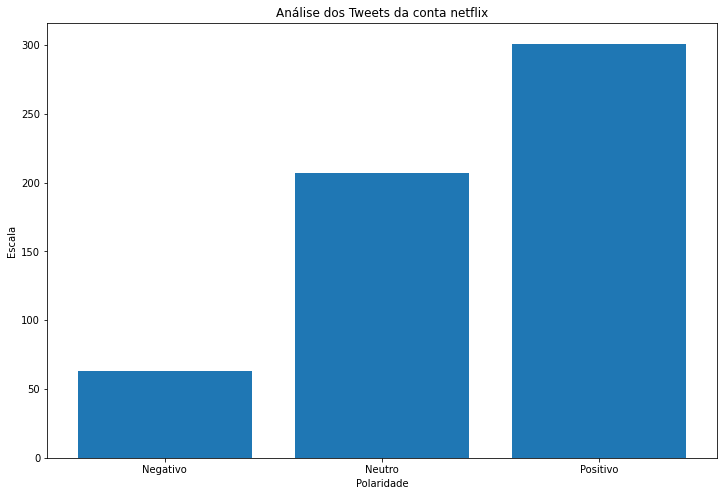

In [105]:
labels = df1.groupby('Score').count().index.values

values = df1.groupby('Score').size().values

plt.xlabel('Polaridade')
plt.ylabel('Escala')
plt.title('Análise dos Tweets da conta netflix')
plt.bar(labels, values)

##### @NetflixBrasil

<BarContainer object of 3 artists>

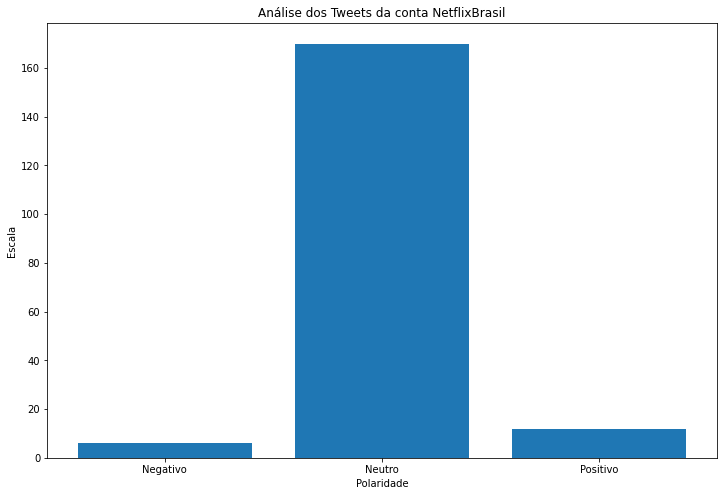

In [106]:
labels = df2.groupby('Score').count().index.values

values = df2.groupby('Score').size().values

plt.xlabel('Polaridade')
plt.ylabel('Escala')
plt.title('Análise dos Tweets da conta NetflixBrasil')
plt.bar(labels, values)

#### 6) Qual a média de sentimento dos tweets que contam com a #winx?

In [107]:
public_tweets = twetterApi.search('#winx')

#Variável que irá armazenar as polaridades
analysis = None

tweets = [] # Lista vazia para armazenar scores
for tweet in public_tweets:
    analysis = tb(tweet.text)
    polarity = analysis.sentiment.polarity
    tweets.append(polarity)
   
    
print('MÉDIA DE SENTIMENTO: ' + str(np.mean(tweets)))

MÉDIA DE SENTIMENTO: 0.13587301587301587
